<a href="https://colab.research.google.com/github/ykitaguchi77/Laboratory_course/blob/master/6.%20Python%E3%82%92%E7%94%A8%E3%81%84%E3%81%9FLinear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**6. Linear Regression using sklearn**

#糖尿病データセット（Diabetes Dataset）
scikit-learnに内蔵されている回帰分析用のサンプルデータセット。
442人の患者データで、1年後の疾患進行度を予測します。

##特徴量（説明変数）
| 特徴量 | 意味 |
|-------|------|
| age | 年齢 |
| sex | 性別 |
| bmi | BMI（肥満度指数） |
| bp | 平均血圧 |
| s1 (tc) | 総コレステロール |
| s2 (ldl) | LDLコレステロール（悪玉） |
| s3 (hdl) | HDLコレステロール（善玉） |
| s4 (tch) | 総コレステロール/HDL比 |
| s5 (ltg) | 中性脂肪（log値） |
| s6 (glu) | 血糖値 |

##目的変数
- **Progression**: 1年後の疾患進行度

※データは標準化済み（各列の二乗和が1になるようスケーリング）

In [ ]:
# 必要ライブラリをインポート
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# データをインポートしてDataFrameの内容とデータ型、欠損の確認をする
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes()
# 説明変数
exp_data = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
# 目的変数
tar_data = pd.DataFrame(diabetes_data.target, columns=['Progression'])
# データを結合
data = pd.concat([exp_data, tar_data], axis=1)
display(data.head())
print(data.shape) # (442, 11)
# print(data.dtypes) # 全てfloat64
# print(data.isnull().sum()) # 全て0

In [ ]:
# ヒートマップを表示
plt.figure(figsize=(12, 9))
sns.heatmap(data.corr(), annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.savefig('diabetes_heatmap.png')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

# データセットの読み込み
diabetes = load_diabetes()

# 説明変数
X_array = diabetes.data
# 目的変数
y_array = diabetes.target

# DataFrameの作成
df = pd.DataFrame(X_array, columns=diabetes.feature_names).assign(Progression=np.array(y_array))

# データの確認
df

In [ ]:
# ----------------散布図を作成-------------------
import matplotlib.pyplot as plt

# 'bmi'列と'Progression'列をxとyに代入
x = df['bmi']
y = df['Progression']

# 散布図の作成
plt.figure(figsize=(10, 6))  # グラフサイズの設定
plt.scatter(x, y, s=5, c="red")  # 散布図のプロット

# 軸ラベルの設定
plt.xlabel('BMI (Body Mass Index)')  # x軸ラベル
plt.ylabel('Disease Progression')  # y軸ラベル

# タイトルの設定
plt.title('Relationship between BMI and Disease Progression')

# グリッドの追加
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

#**最急降下法について学習しよう**
Cost: J = (sum((θ×X - y)^2)/2m <br>
Cost function: J(θ) =1/2m * Σ(hθ(x(i)^-y(i)))^2 <br>

最急降下法：(Cost function J(θ)の微分を減算する）<br>
θj = θj - α * 1/m * Σ((h(x(i)-y(i))*Xj(i) )

In [ ]:
# [1,x]に相当する行列を作成する
X = np.array([[1, v] for v in x])
X

array([[1.    , 8.3252],
       [1.    , 8.3014],
       [1.    , 7.2574],
       ...,
       [1.    , 1.7   ],
       [1.    , 1.8672],
       [1.    , 2.3886]])

In [ ]:
#今回は一次関数で近似します。
#y=bx+a (y=a*1 +b*x)の係数[a,b]としてランダムな値を作成する
theta = np.random.random(len(X[0]))
theta

array([0.65891536, 0.08778543])

In [ ]:
# 微分値により係数をどれぐらい動かすかを決定する
alpha = 0.01

In [ ]:
y_pred = np.dot(X, theta)
y_pred

array([1.38974659, 1.38765729, 1.29600931, ..., 0.80815058, 0.82282831,
       0.86859963])

In [ ]:
#y=bx+a (y=a*1 +b*x)の係数[a,b]としてランダムな値を作成する
theta = np.random.random(len(X[0]))

# [1,x]に相当する行列を作成する
X = np.array([[1, v] for v in x])

# 微分値により係数をどれぐらい動かすかを決定する
alpha = 0.01

# ------wをちょっとずつ変えていくループを実行------
# ループ回数100回、1000回、10000回、100000回でwを保存する
theta_1 = []
theta_10 = []
theta_100 = []
theta_1000 = []
theta_10000 = []
for i in range(100000):
    # theta = [b,a]
    # y_pred=b*1+a*xに先ほどの行列を代入して予測値y_predを計算する。dotは行列の積を計算するコード
    y_pred = np.dot(X, theta)
    # 最小二乗法の損失関数 loss_func = (y-y_pred)^2 = (y-theta*X)^2
    # loss_funcをthetaで微分すると、2*theta*X^2 - 2Xy = 2(theta*X-y)*X = -2(y-y_pred)*X
    dw = -2*np.dot((y - y_pred), X) / len(X)
    # wをちょっとだけ動かす
    theta -= alpha * dw

    #1, 10, 100, 1000, 10000, 100000回目のthetaを記録
    if i == 1-1:
        # listはnp.copyしないとコピー元と同期してしまうので注意！
        theta_1 = np.copy(theta)
        print(f"dw_1: {dw}")
    if i == 10-1:
        theta_10 = np.copy(theta)
        print(f"dw_10: {dw}")
    if i == 100-1:
        theta_100 = np.copy(theta)
        print(f"dw_100: {dw}")
    elif i == 1000-1:
        theta_1000 = np.copy(theta)
        print(f"dw_1000: {dw}")
    elif i == 10000-1:
        theta_10000 = np.copy(theta)
        print(f"dw_10000: {dw}")
    elif i == 100000-1:
        theta_100000 = np.copy(theta)
        print(f"dw_100000: {dw}")

dw_1: [-0.69512475 -2.6022189 ]
dw_10: [-0.14359395 -0.00285191]
dw_100: [-0.09791737  0.02059227]
dw_1000: [-0.00342155  0.00071956]
dw_10000: [-2.70446886e-15  2.68794461e-15]
dw_100000: [-2.70446886e-15  2.68794461e-15]


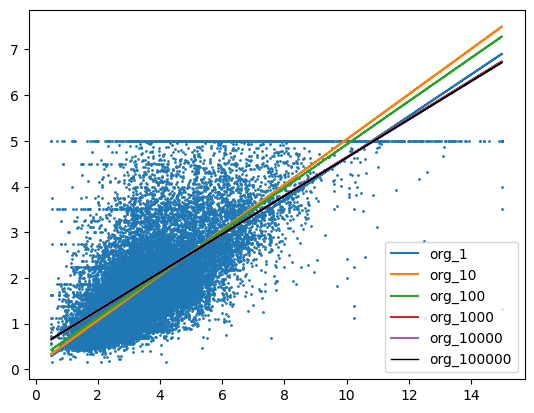

In [ ]:
# ----------------散布図を作成-------------------
plt.scatter(x, y, s=1)

# ----------------計算式の結果-------------------
plt.plot(x, np.dot(X, theta_1), label='org_1')
plt.plot(x, np.dot(X, theta_10), label='org_10')
plt.plot(x, np.dot(X, theta_100), label='org_100')
plt.plot(x, np.dot(X, theta_1000), label='org_1000')
plt.plot(x, np.dot(X, theta_10000), label='org_10000')
plt.plot(x, np.dot(X, theta_100000), c='black', linewidth=1.0, label='org_100000')


plt.legend()
plt.show()

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

# ######### sklearnのツールLinearRegressionを使って回帰 ###########
# ものすごく簡単...
lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)
pred = lr.predict(X)

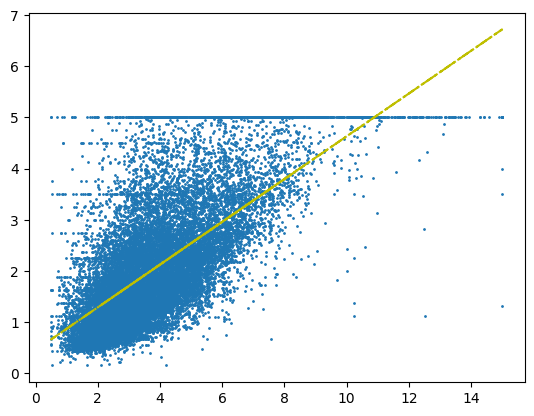

In [ ]:
# ----------------散布図を作成-------------------
plt.scatter(x, y, s=1)
# ---------------sklearnの結果------------------
plt.plot(x, pred, c='y', linestyle='dashdot', label='sklearn')
